# Before and After Brexit

Brexit(The U.K exit from European Union) was a huge decision of U.K in 2016. To leave or not be leave, shall be a question. But the vote was over and the British government formally announced the country's withdrawal in March 2017, beginning the Brexit process. Whether the decision was good or bad, data will tell us the truth. This report uses the comparasion of migration, employment and income of before and after Brexit to analysis this decision.

Note that Brexit may not be the inly reason to affect all of these data changed. The project is to revealed and analysis theses data before and after the timeline of Brexit(year 2016).
Data source from: https://www.electoralcommission.org.uk/ The Electoral Commission, the election commission of the United Kingdom; https://www.ons.gov.uk/ The Office for National Statistics, the executive office of the UK Statistics Authority, a non-ministerial department which reports directly to the UK Parliament.


# Vote Result

Starting with the vote summary: 52% of the population in UK voted to leave and 48% voted to remain in the EU.

If we look at the vote summary from country level and region level, we can see people in different area have different opinion towards the Brexit.
The vote summary presented below:

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]

Votes result from Countries


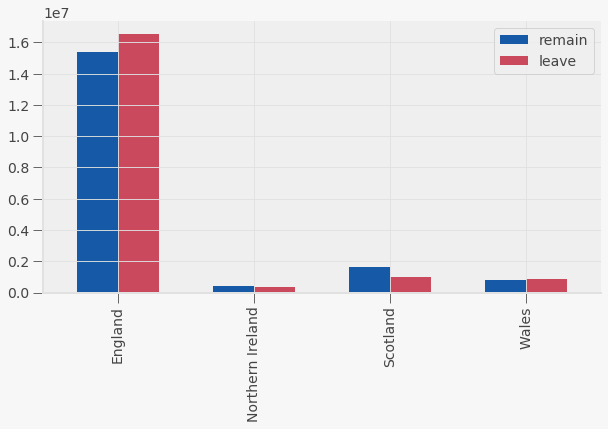

In [84]:
vote_raw = pd.read_csv("EU-referendum-result-data.csv")
country = ['England','Northern Ireland','Scotland','Wales']
vote = pd.DataFrame(vote_raw)
#vote from England raw data
vote_not_NI = vote.loc[vote['Region']!='Northern Ireland']
vote_not_NISC =  vote.loc[vote['Region']!='Scotland']
vote_eng_raw =  vote.loc[vote['Region']!='Wales']

vote_NI_raw = vote.loc[vote['Region']=='Northern Ireland'] #vote from North Ireland raw data
vote_walves_raw = vote.loc[vote['Region']=='Wales']        #vote from Walves raw data
vote_scotland_raw = vote.loc[vote['Region']=='Scotland']   #vote from Scotland raw data

def count_vote(data):
    num=0
    for i in data:
        num += i
    return num
 
remain = []
leave = []

remain.append(count_vote(vote_eng_raw['Remain']))
leave.append(count_vote(vote_eng_raw['Leave']))
remain.append(count_vote(vote_NI_raw['Remain']))
leave.append(count_vote(vote_NI_raw['Leave']))
remain.append(count_vote(vote_scotland_raw['Remain']))
leave.append(count_vote(vote_scotland_raw['Leave']))
remain.append(count_vote(vote_walves_raw['Remain']))
leave.append(count_vote(vote_walves_raw['Leave']))


df = pd.DataFrame({'remain': remain,
                   'leave': leave}, index=country)
print("Votes result from Countries")
ax = df.plot(kind='bar', width=0.6)


From the votes summary, we can observe that: in country level, people in Northern Ireland and Scotland prefer to remain in the EU; people in England and Walves wants to exit. And England has the most population and has much larger population compared to the other countries, it made votes in England took part in the major role of this decision.

Votes result in England


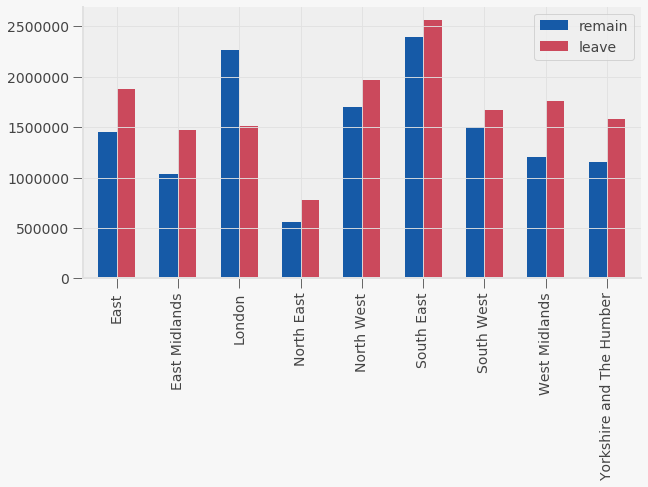

In [83]:
area = ['East','East Midlands','London','North East','North West','South East','South West','West Midlands','Yorkshire and The Humber']
vote = pd.DataFrame(vote_raw)
#vote from England raw data
vote_east = vote.loc[vote['Region']=='East']
vote_EM =  vote.loc[vote['Region']=='East Midlands']
vote_london =  vote.loc[vote['Region']=='London']
vote_NE = vote.loc[vote['Region']=='North East'] 
vote_NW = vote.loc[vote['Region']=='North West']
vote_SE = vote.loc[vote['Region']=='South East']
vote_SW = vote.loc[vote['Region']=='South West']  
vote_WM = vote.loc[vote['Region']=='West Midlands'] 
vote_york = vote.loc[vote['Region']=='Yorkshire and The Humber'] 


def count_vote(data):
    num=0
    for i in data:
        num += i
    return num
 
remain = []
leave = []

remain.append(count_vote(vote_east['Remain']))
leave.append(count_vote(vote_east['Leave']))
remain.append(count_vote(vote_EM['Remain']))
leave.append(count_vote(vote_EM['Leave']))
remain.append(count_vote(vote_london['Remain']))
leave.append(count_vote(vote_london['Leave']))
remain.append(count_vote(vote_NE['Remain']))
leave.append(count_vote(vote_NE['Leave']))
remain.append(count_vote(vote_NW['Remain']))
leave.append(count_vote(vote_NW['Leave']))
remain.append(count_vote(vote_SE['Remain']))
leave.append(count_vote(vote_SE['Leave']))
remain.append(count_vote(vote_SW['Remain']))
leave.append(count_vote(vote_SW['Leave']))
remain.append(count_vote(vote_WM['Remain']))
leave.append(count_vote(vote_WM['Leave']))
remain.append(count_vote(vote_york['Remain']))
leave.append(count_vote(vote_york['Leave']))


plt
df1 = pd.DataFrame({'remain': remain,
                   'leave': leave}, index=area)
print("Votes result in England")
ax = df1.plot(kind='bar', width=0.6)

Surprisingly, London is the only area majorly "remain" in the whole England. In my opinion, the voting results of London might had related to the amount of non-British population(people were not born in British). There are 37% of population in London were non-British, and 24.5% in London are non-European population. This could explain some factor of the result. Many foreigners or non-British people were afraid of changes of Brexit. Foreign policies changed might cause different effect on many of these non-British population.

# Immigration

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text xticklabel objects>)

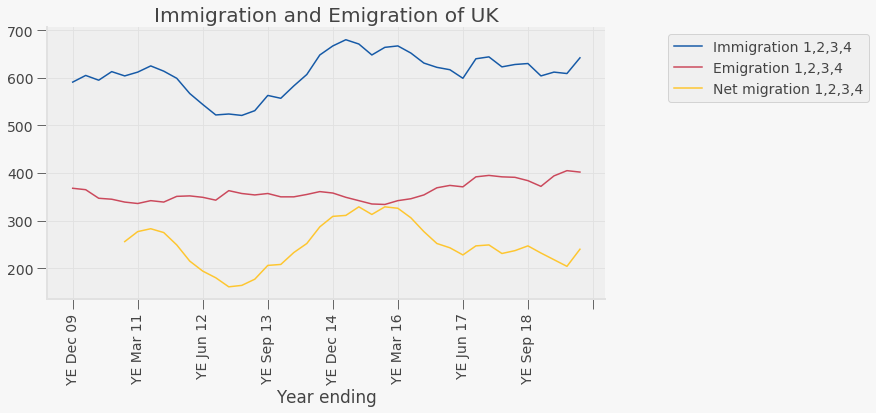

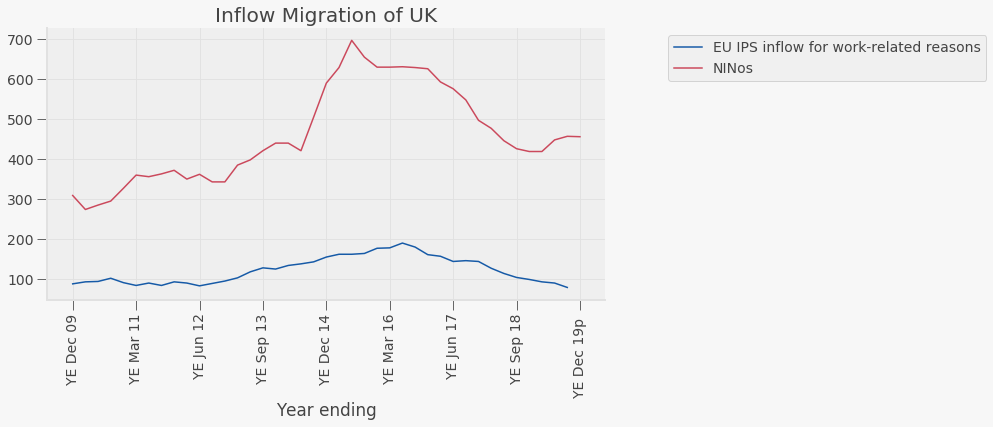

In [320]:
imm = pd.read_csv('migration.csv')
imm_work = pd.read_csv('work_imm.csv')
imm.plot(x='Year ending',title='Immigration and Emigration of UK').legend(bbox_to_anchor=(1.1, 1))
# df.plot(x ='Period', y=['UK nationals','EU nationals','Non-EU nationals'], kind = 'line').legend(bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=90)
df_imm_work = pd.DataFrame(imm_work)
df_imm_work.plot(x='Year ending',title='Inflow Migration of UK').legend(bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=90)

The chart "Immigration and Emigration of UK" is long-term migration of UK, which long-term indicates staying over 12 months in UK. NiNos in the chart "Inflow Migration of UK" means number of National Insurance number registration. Foreign citizens require National Insurance number to work in UK. EU IPS inflow is the International Passenger Survey of inflow, which is the data collected when passengers entering and leaving UK. Both charts are in unit of thousands people. The curve is obvious that amount of immigrations significantly decreased after the Brexit.

# Employment Rate

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text xticklabel objects>)

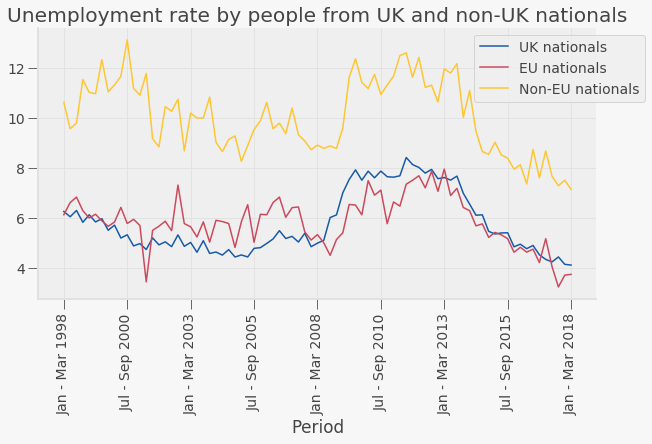

In [318]:
unemp_raw = pd.read_csv("unemp.csv")
df = pd.DataFrame(unemp_raw,columns=['Period','UK nationals','EU nationals','Non-EU nationals'])
df.plot(x ='Period', y=['UK nationals','EU nationals','Non-EU nationals'], kind = 'line', title='Unemployment rate by people from UK and non-UK nationals').legend(bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=90)


We can see the unemployment rate of UK nationals decreased after 2016. However, the unemployment rate of non-UK nationals also decreases. Which means the decrease of unemployment rate is less likely related to the Brexit. Even though EU nationals unemployment rate increased after Brexit, yet it remains decreasing trend right after. It could indicate the Brexit did not affect non-UK nationals uneployment.

Some people believed Brexit was good since foreigners took their jobs. From this chart, we can conclude that Brexit does not affect non-UK workers unemployment. Conclusion to those people we believed foreign workers took their jobs, that is not true!

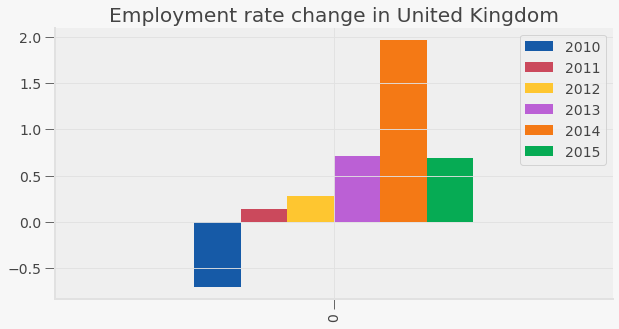

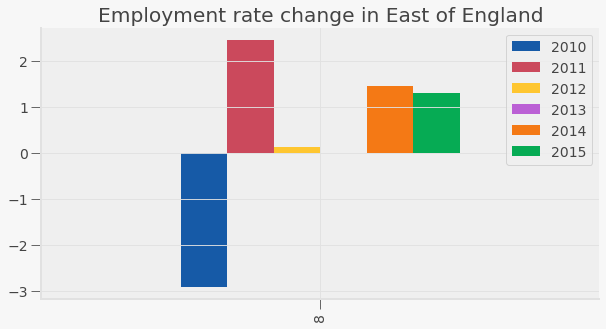

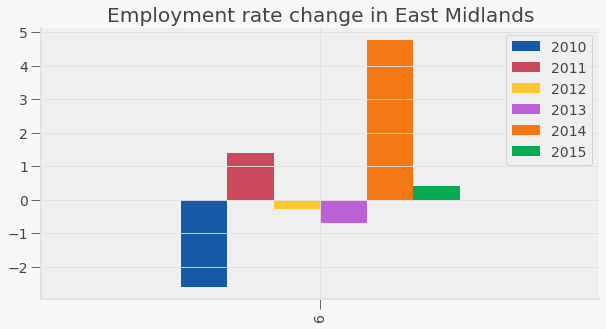

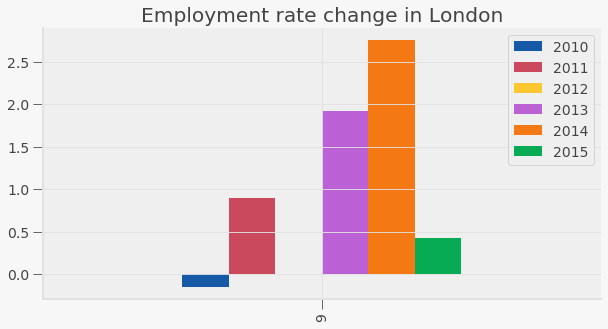

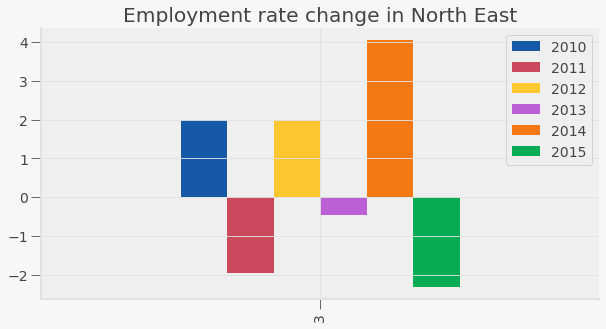

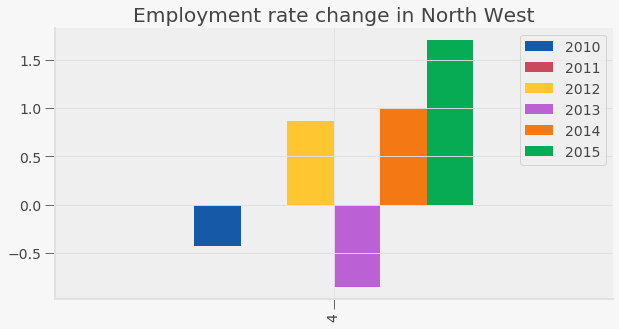

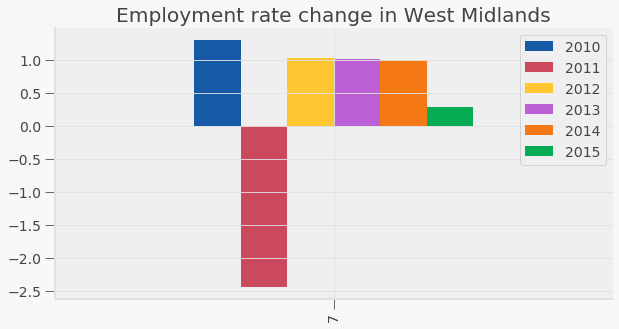

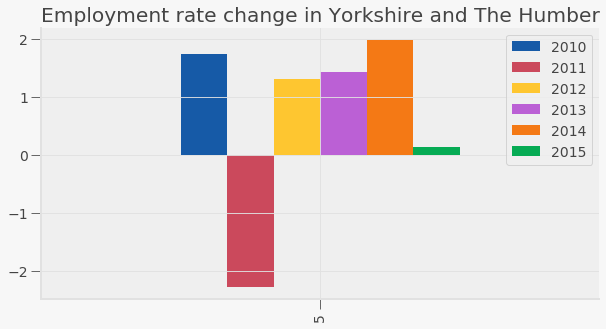

In [319]:
emp_reg = pd.read_csv("employment 2015.csv")
region = emp_reg['Region']
em2015 = emp_reg['2015']
em2014 = emp_reg['2014']
em2013 = emp_reg['2013']
em2012 = emp_reg['2012']
em2011 = emp_reg['2011']
em2010 = emp_reg['2010']
em2009 = emp_reg['2009']
e2015=[]
e2014=[]
e2013=[]
e2012=[]
e2011=[]
e2010=[]

num = len(region)
for i in range(num):
    e2015.append((em2015[i]-em2014[i])/em2014[i]*100)
    e2014.append((em2014[i]-em2013[i])/em2013[i]*100)
    e2013.append((em2013[i]-em2012[i])/em2012[i]*100)
    e2012.append((em2012[i]-em2011[i])/em2011[i]*100)
    e2011.append((em2011[i]-em2010[i])/em2010[i]*100)
    e2010.append((em2010[i]-em2009[i])/em2009[i]*100)
    
data = {'Region':region,  '2010':e2010, '2011':e2011,'2012':e2012, '2013':e2013, '2014':e2014,'2015':e2015}
df = pd.DataFrame(data,columns=['Region','2010','2011','2012','2013','2014','2015'])

uk = df[df['Region']=='United Kingdom']
uk.plot.bar(title="Employment rate change in United Kingdom")
east = df[df['Region']=='East of England']
east.plot.bar(title="Employment rate change in East of England")
em = df[df['Region']=='East Midlands']
em.plot.bar(title="Employment rate change in East Midlands")
lon = df[df['Region']=='London']
lon.plot.bar(title="Employment rate change in London")
ne = df[df['Region']=='North East']
ne.plot.bar(title="Employment rate change in North East")
nw = df[df['Region']=='North West']
nw.plot.bar(title="Employment rate change in North West")
wm = df[df['Region']=='West Midlands']
wm.plot.bar(title="Employment rate change in West Midlands")
york = df[df['Region']=='Yorkshire and The Humber']
york.plot.bar(title="Employment rate change in Yorkshire and The Humber")

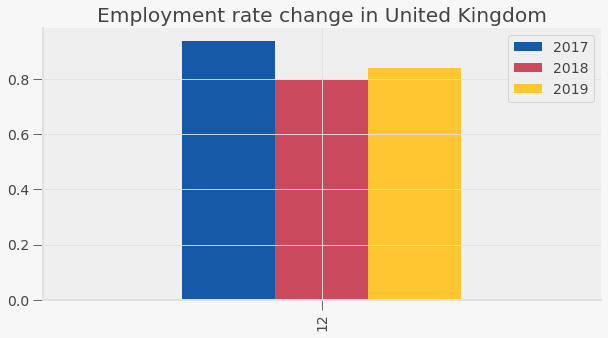

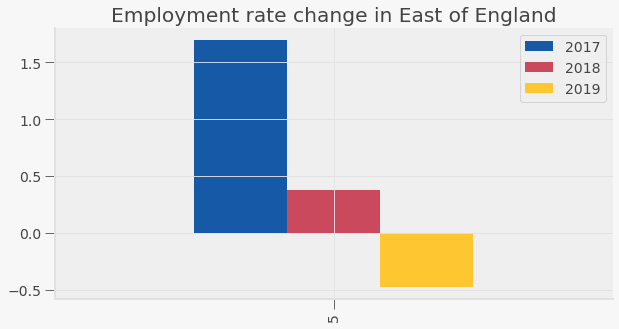

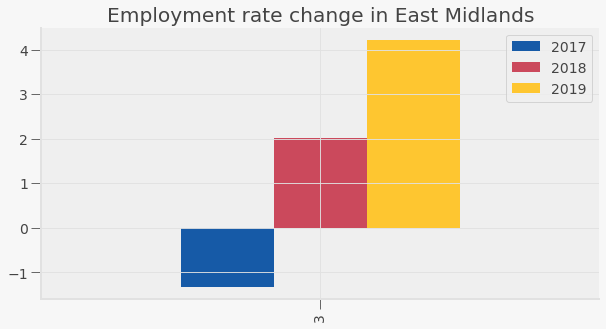

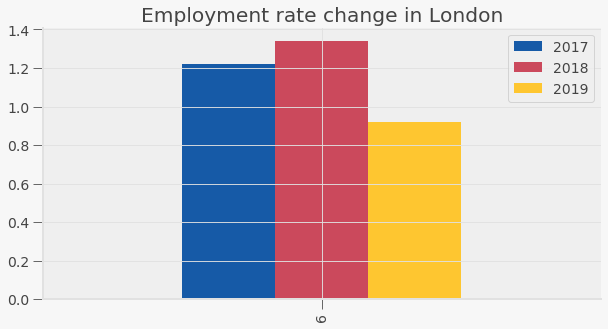

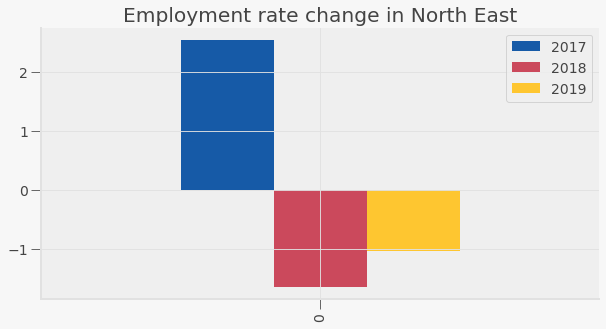

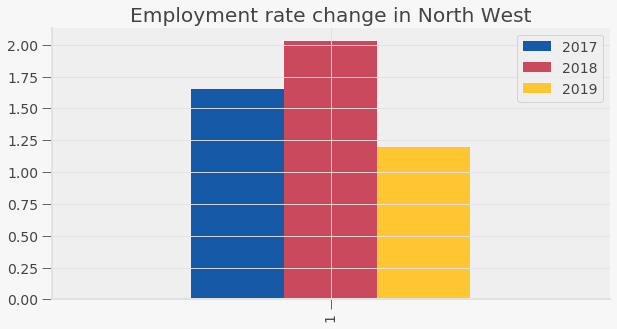

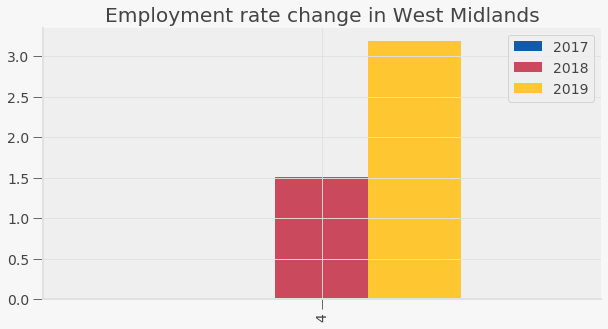

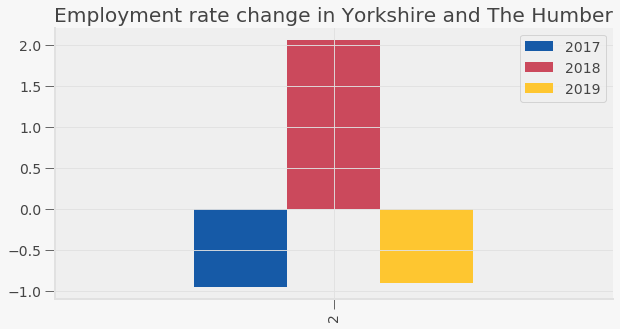

In [234]:
emp_ratio = pd.read_csv('empratio2019.csv')
df = pd.DataFrame(emp_ratio)
uk = df[df['Region']=='UK']
uk.plot.bar(title="Employment rate change in United Kingdom")
east = df[df['Region']=='East ']
east.plot.bar(title="Employment rate change in East of England")
em = df[df['Region']=='East Midlands']
em.plot.bar(title="Employment rate change in East Midlands")
lon = df[df['Region']=='London']
lon.plot.bar(title="Employment rate change in London")
ne = df[df['Region']=='North East']
ne.plot.bar(title="Employment rate change in North East")
nw = df[df['Region']=='North West']
nw.plot.bar(title="Employment rate change in North West")
wm = df[df['Region']=='West Midlands']
wm.plot.bar(title="Employment rate change in West Midlands")
york = df[df['Region']=='Yorkshire and The Humber']
york.plot.bar(title="Employment rate change in Yorkshire and The Humber")

We can see that for the whole UK area, employment rate has increased through out 2010-2019. London area which was the only area wanted to "remain", employment rate has increased. However, for the rest of the "leave" regions, only North West, West Midlands and South West kept the increasing employment rate(no negative ratio change in employment rate after 2016). From perspective of employment rate, Brexit was a good decision for North West, West Midlands, South West and London area, since their employment rate increases.

Note: change ratio of Employment rate of Year 2019 in the data means employment rate difference between year 2019 and 2018. Same applied for all datas above.

# Total Gross Disposable Household Income(GDHI)

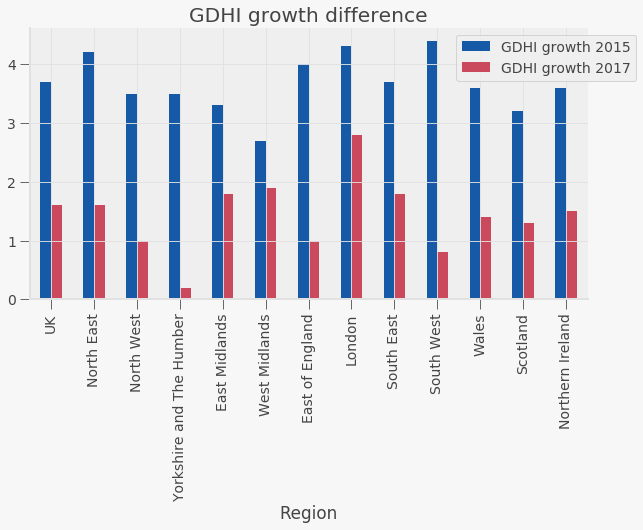

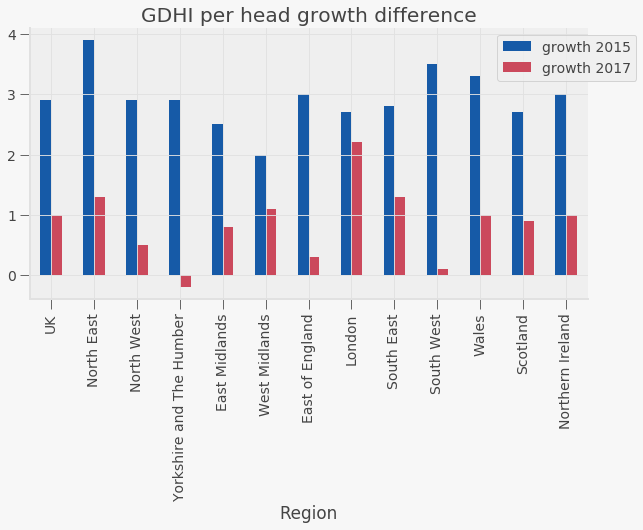

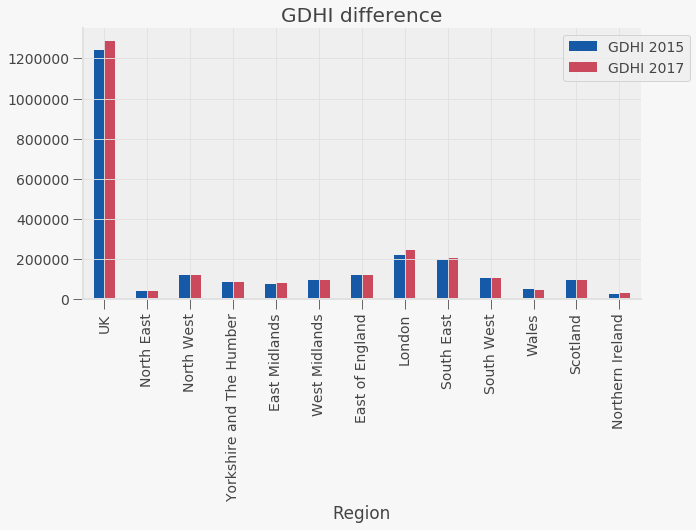

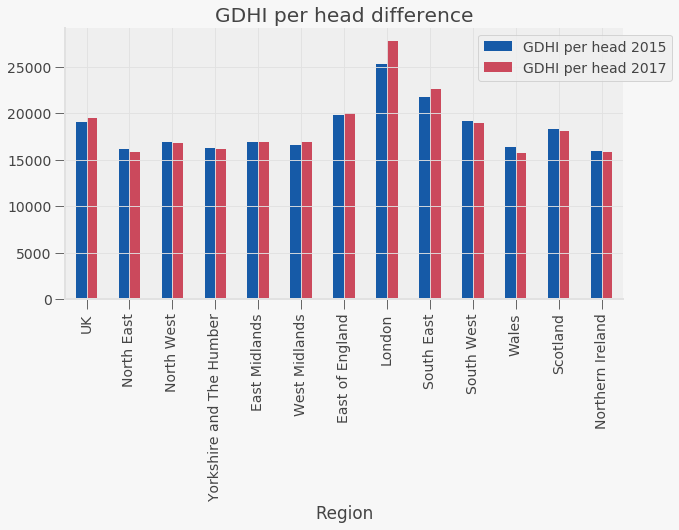

In [288]:
income15 = pd.read_csv('income_2015.csv')
income17 = pd.read_csv('income2017.csv')
region = income15['Regions']
gdp_per_15 = income15['GDHI per head ']
gdp_per_17 = income17['GDHI per head']
gdp_grow15 = income15['GDHI per head growth on 2014 (percentage)']
gdp_grow17 = income17['GDHI per head growth on 2016 (percentage)']
gdp15 = income15['Total GDHI ']
gdp17 = income17['Total GDHI']
gdp_g15 = income15['Total GDHI growth on 2014 (percentage)']
gdp_g17 = income17['Total GDHI growth on 2016 (percentage)']
data_growth = {'Region':region,'GDHI growth 2015': gdp_g15, 'GDHI growth 2017': gdp_g17}
data_per_grow = {'Region':region,'growth 2015':gdp_grow15,'growth 2017':gdp_grow17}
data = {'Region':region, 'GDHI 2015':gdp15,'GDHI 2017':gdp17 }
data_per={'Region':region, 'GDHI per head 2015':gdp_per_15,'GDHI per head 2017':gdp_per_17}
df_growth = pd.DataFrame(data_growth)
df_per_growth = pd.DataFrame(data_per_grow)
df_per = pd.DataFrame(data_per)
df_per['GDHI per head 2015']= df_per['GDHI per head 2015'].str.replace(',', '')
df_per['GDHI per head 2017']= df_per['GDHI per head 2017'].str.replace(',', '')
df_per['GDHI per head 2015']= pd.to_numeric(df_per['GDHI per head 2015'])
df_per['GDHI per head 2017']= pd.to_numeric(df_per['GDHI per head 2017'])

df = pd.DataFrame(data)
df['GDHI 2015']= df['GDHI 2015'].str.replace(',', '')
df['GDHI 2017']= df['GDHI 2017'].str.replace(',', '')
df['GDHI 2015']= pd.to_numeric(df['GDHI 2015'])
df['GDHI 2017']= pd.to_numeric(df['GDHI 2017'])

df_growth.plot.bar(x='Region',title='GDHI growth difference').legend(bbox_to_anchor=(1.1, 1))
df_per_growth.plot.bar(x='Region',title='GDHI per head growth difference').legend(bbox_to_anchor=(1.1, 1))
df.plot.bar(x='Region',title='GDHI difference').legend(bbox_to_anchor=(1.1, 1))
df_per.plot.bar(x='Region',title='GDHI per head difference').legend(bbox_to_anchor=(1.1, 1))

From the summary above, we can see North East area have less total GDHI in 2017 compared to 2015. Also Yorkshire and The Humber area has GDHI per head negative growth in 2017: the total GDHI of 2017 is more than toal GDHI in 2015, the decrease of GDHI per head is most likely due to the population growth of this area, hence resulting the GDHI per head dropped in 2017 compared to 2015. Walves and Scotland both have less total GDHI in 2017 than 2015. They are the victims of Brexit. Especially Scotland, 2/3 of people from Scotland voted "remain".

In [351]:
avg_uk = pd.DataFrame(df_per.loc[df_per['Region']=='UK'])
avg_other = pd.DataFrame(df_per.loc[df_per['Region']!='UK'])
average_per = pd.DataFrame(avg_other.mean())
print(average_per.head())
print(avg_uk.head())
print(avg_other)


                               0
GDHI per head 2015  18288.916667
GDHI per head 2017  18477.500000
  Region  GDHI per head 2015  GDHI per head 2017
0     UK               19106               19514
                      Region  GDHI per head 2015  GDHI per head 2017
1                 North East               16197               15809
2                 North West               16915               16861
3   Yorkshire and The Humber               16267               16119
4              East Midlands               16935               16932
5              West Midlands               16559               16885
6            East of England               19796               20081
7                     London               25293               27825
8                 South East               21808               22568
9                 South West               19128               18984
10                     Wales               16341               15754
11                  Scotland               1

In average, UK has high GDHI per head, London area and South East contribute the most to the GDHI. Interestingly, if we put UK's GDHI per head in comparasion of all the area, we can see UK is the third place. It shows how much different in terms of income level between London, South East and the other area.

Brexit had affected many people in different area, from the datas we can see that economically, UK has steady increasing trend after Brexit. Even though the Yorkshire and the Humber area had slightly drop of GDHI per head, Brexit has positive affect to the UK's economy. For the workers, employment rate also increased in UK; also number of immigration and foreign workers dropped significantly after Brexit, it should be a good sign for local British worker. Hence, despite other factors, Brexit has positive affect in UK. Even though, almost half of the population(48%) wanted to remain in the EU.